In [1]:
pwd

'D:\\'

In [3]:
#dataset1   ---  D:\E Driv Data\DATASETS\CASIA-3D-FACE-DATASET

# detected Faces ---  D:\Securing MULTIMODAL biometrics using FHE\Face\Detected-Faces-CASIA-MTCNN

# Pinsface --  D:\Face classification\Face DATASETS\105_CLAHE_Enhanced_and_balanced_50images

# Pins face --- D:\Face classification\Face DATASETS\105_MTCNN_detected ---- balanced only 50 images 

# pins facwe full dataset  ---D:\Face classification\Face DATASETS\105_classes_pins_dataset

In [4]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install torch torchvision facenet-pytorch

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch==2.2.2 torchvision==0.17.2 facenet-pytorch==2.6.0

Note: you may need to restart the kernel to use updated packages.


In [67]:
import os
import random
import shutil
from pathlib import Path

# Set source and destination paths
src_root = r"D:\Face classification\Face DATASETS\105_classes_pins_dataset"
dst_root = r"D:\Face classification\Face DATASETS\105_classes_pins_dataset_60_per_class"

# Create the destination root directory if it doesn't exist
os.makedirs(dst_root, exist_ok=True)

# Loop through each class directory
for class_name in os.listdir(src_root):
    class_src_path = os.path.join(src_root, class_name)
    class_dst_path = os.path.join(dst_root, class_name)
    
    if not os.path.isdir(class_src_path):
        continue  # skip if it's not a folder

    # Get list of image files
    image_files = [f for f in os.listdir(class_src_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Ensure there are enough images
    if len(image_files) < 60:
        print(f"Skipping {class_name}: only {len(image_files)} images available.")
        continue

    # Randomly select 60 images
    selected_images = random.sample(image_files, 60)

    # Create destination class directory
    os.makedirs(class_dst_path, exist_ok=True)

    # Copy selected images to the new folder
    for img_name in selected_images:
        src_img_path = os.path.join(class_src_path, img_name)
        dst_img_path = os.path.join(class_dst_path, img_name)
        shutil.copy2(src_img_path, dst_img_path)

    print(f"Copied 60 images for class: {class_name}")

print("\n✅ Dataset subset created successfully at:", dst_root)


Copied 60 images for class: pins_Adriana Lima
Copied 60 images for class: pins_Alex Lawther
Copied 60 images for class: pins_Alexandra Daddario
Copied 60 images for class: pins_Alvaro Morte
Copied 60 images for class: pins_alycia dabnem carey
Copied 60 images for class: pins_Amanda Crew
Copied 60 images for class: pins_amber heard
Copied 60 images for class: pins_Andy Samberg
Copied 60 images for class: pins_Anne Hathaway
Copied 60 images for class: pins_Anthony Mackie
Copied 60 images for class: pins_Avril Lavigne
Copied 60 images for class: pins_barack obama
Copied 60 images for class: pins_barbara palvin
Copied 60 images for class: pins_Ben Affleck
Copied 60 images for class: pins_Bill Gates
Copied 60 images for class: pins_Bobby Morley
Copied 60 images for class: pins_Brenton Thwaites
Copied 60 images for class: pins_Brian J. Smith
Copied 60 images for class: pins_Brie Larson
Copied 60 images for class: pins_camila mendes
Copied 60 images for class: pins_Chris Evans
Copied 60 image

In [ ]:
# Install required packages
# !pip install facenet-pytorch scikit-learn --quiet

In [96]:


# Import libraries
import os
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from facenet_pytorch import InceptionResnetV1

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load FaceNet model
facenet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Define transform (resized to 160x160, normalized as expected by FaceNet)
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load aligned faces dataset
# aligned_faces_path = r'D:\Securing MULTIMODAL biometrics using FHE\Face\Detected-Faces-CASIA-MTCNN'  # your path to aligned face folders
# aligned_faces_path = r'D:\E Driv Data\DATASETS\CASIA-3D-FACE-DATASET'
# aligned_faces_path = r'D:\Face classification\Face DATASETS\105_MTCNN_detected'
# aligned_faces_path = r"D:\Face classification\Face DATASETS\105_classes_pins_dataset_60_per_class"
aligned_faces_path = r"D:\Face classification\Face DATASETS\105_classes_pins_dataset"
dataset = datasets.ImageFolder(aligned_faces_path, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

label_map = {v: k for k, v in dataset.class_to_idx.items()}

# Extract embeddings
embedding_list = []
label_list = []

print("Extracting embeddings from aligned faces...")
for img, label in tqdm(loader):
    img = img.to(device)
    with torch.no_grad():
        embedding = facenet(img).cpu().numpy()
    embedding_list.append(embedding[0])
    label_list.append(label.item())



Extracting embeddings from aligned faces...


100%|██████████████████████████████████████████████████████████████████████████| 17534/17534 [4:54:45<00:00,  1.01s/it]


In [97]:
# Convert to arrays
X = np.array(embedding_list)
y = np.array(label_list)


In [98]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# # Train SVM classifier
# clf = SVC(kernel='linear', probability=True)
# clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [101]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [103]:
# from sklearn.neighbors import KNeighborsClassifier

# clf = KNeighborsClassifier(n_neighbors=5)
# clf.fit(X_train, y_train)


KNeighborsClassifier()

In [105]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

In [106]:

# Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[label_map[i] for i in set(y)]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 98.37%

Classification Report:
                             precision    recall  f1-score   support

          pins_Adriana Lima       1.00      0.98      0.99        42
          pins_Alex Lawther       1.00      1.00      1.00        33
    pins_Alexandra Daddario       1.00      1.00      1.00        41
          pins_Alvaro Morte       1.00      1.00      1.00        18
           pins_Amanda Crew       1.00      1.00      1.00        21
          pins_Andy Samberg       0.97      1.00      0.99        39
         pins_Anne Hathaway       1.00      1.00      1.00        42
        pins_Anthony Mackie       1.00      1.00      1.00        30
         pins_Avril Lavigne       1.00      0.97      0.98        33
           pins_Ben Affleck       1.00      1.00      1.00        27
            pins_Bill Gates       0.96      1.00      0.98        26
          pins_Bobby Morley       1.00      0.92      0.96        12
      pins_Brenton Thwaites       0.93      0.98      0.95  

In [ ]:
# RF 
# Accuracy: 99.57%

# Classification Report:
#               precision    recall  f1-score   support

#          001       1.00      0.89      0.94         9
#          002       0.86      1.00      0.92         6
#          003       1.00      1.00      1.00        11
#          004       1.00      1.00      1.00        10
#          005       1.00      1.00      1.00        12
#          006       1.00      1.00      1.00         9
#          007       1.00      1.00      1.00         7
#          008       1.00      1.00      1.00        10
#          009       1.00      1.00      1.00         8
#          010       1.00      1.00      1.00         9
#          011       1.00      1.00      1.00         5
#          012       1.00      1.00      1.00        11
#          013       1.00      1.00      1.00         9
#          014       0.88      1.00      0.93         7
#          015       1.00      1.00      1.00         8
#          016       1.00      1.00      1.00        10
#          017       1.00      1.00      1.00         7
#          018       1.00      1.00      1.00         6
#          019       1.00      1.00      1.00         6
#          020       1.00      1.00      1.00         6
#          021       1.00      1.00      1.00         5
#          022       1.00      1.00      1.00        11
#          023       1.00      1.00      1.00        10
#          024       1.00      1.00      1.00         8
#          025       1.00      1.00      1.00         5
#          026       1.00      1.00      1.00         7
#          027       1.00      1.00      1.00         5
#          028       1.00      1.00      1.00        13
#          029       1.00      1.00      1.00         8
#          030       1.00      1.00      1.00        12
#          031       1.00      1.00      1.00         6
#          032       1.00      1.00      1.00        13
#          033       1.00      1.00      1.00        10
#          034       1.00      1.00      1.00         6
#          035       1.00      1.00      1.00         5
#          036       1.00      1.00      1.00         7
#          037       1.00      1.00      1.00         8
#          038       1.00      1.00      1.00        10
#          039       1.00      1.00      1.00         6
#          040       1.00      1.00      1.00         9
#          041       1.00      1.00      1.00         9
#          042       1.00      1.00      1.00         7
#          043       1.00      1.00      1.00         6
#          044       1.00      1.00      1.00         5
#          045       1.00      1.00      1.00         5
#          046       0.89      1.00      0.94         8
#          047       1.00      1.00      1.00        11
#          048       1.00      1.00      1.00        11
#          049       1.00      0.88      0.93         8
#          050       1.00      1.00      1.00         9
#          051       1.00      1.00      1.00         6
#          052       1.00      1.00      1.00         7
#          053       1.00      1.00      1.00         7
#          054       1.00      1.00      1.00         3
#          055       1.00      1.00      1.00         5
#          056       1.00      1.00      1.00         6
#          057       1.00      1.00      1.00        12
#          058       1.00      1.00      1.00         6
#          059       1.00      1.00      1.00         7
#          060       1.00      1.00      1.00         9
#          061       1.00      1.00      1.00         6
#          062       1.00      1.00      1.00        10
#          063       1.00      1.00      1.00         8
#          064       1.00      1.00      1.00         5
#          065       1.00      1.00      1.00         5
#          066       1.00      1.00      1.00         7
#          067       1.00      1.00      1.00         8
#          068       1.00      1.00      1.00         8
#          069       1.00      1.00      1.00         8
#          070       1.00      1.00      1.00         4
#          071       1.00      1.00      1.00         5
#          072       1.00      1.00      1.00        10
#          073       1.00      1.00      1.00         5
#          074       1.00      1.00      1.00         9
#          075       1.00      1.00      1.00         8
#          076       1.00      1.00      1.00         5
#          077       1.00      1.00      1.00         2
#          078       1.00      1.00      1.00         7
#          079       1.00      1.00      1.00         4
#          080       1.00      1.00      1.00         8
#          081       1.00      1.00      1.00         7
#          082       1.00      0.86      0.92         7
#          083       1.00      1.00      1.00         7
#          084       1.00      1.00      1.00         8
#          085       1.00      1.00      1.00         5
#          086       0.83      1.00      0.91         5
#          087       1.00      1.00      1.00         4
#          088       1.00      1.00      1.00         6
#          089       1.00      1.00      1.00         6
#          090       1.00      1.00      1.00         5
#          091       1.00      1.00      1.00         5
#          092       1.00      1.00      1.00        13
#          093       1.00      1.00      1.00         5
#          094       1.00      1.00      1.00         4
#          095       1.00      1.00      1.00         9
#          096       1.00      1.00      1.00         4
#          097       1.00      1.00      1.00         6
#          098       1.00      1.00      1.00        12
#          099       1.00      1.00      1.00         9
#          100       1.00      1.00      1.00        10
#          101       1.00      1.00      1.00         5
#          102       1.00      1.00      1.00         8
#          103       1.00      0.90      0.95        10
#          104       1.00      1.00      1.00         3
#          105       1.00      1.00      1.00         4
#          106       1.00      1.00      1.00         8
#          107       1.00      1.00      1.00         6
#          108       1.00      1.00      1.00        12
#          109       1.00      1.00      1.00         6
#          110       1.00      1.00      1.00         6
#          111       1.00      1.00      1.00         2
#          112       1.00      1.00      1.00         7
#          113       1.00      1.00      1.00        10
#          114       1.00      1.00      1.00        11
#          115       1.00      1.00      1.00         6
#          116       1.00      1.00      1.00        10
#          117       1.00      1.00      1.00         7
#          118       1.00      1.00      1.00         9
#          119       1.00      1.00      1.00        10
#          120       1.00      1.00      1.00        10
#          121       1.00      1.00      1.00         7
#          122       1.00      1.00      1.00         7
#          123       1.00      1.00      1.00        10

#     accuracy                           1.00       920
#    macro avg       1.00      1.00      1.00       920
# weighted avg       1.00      1.00      1.00       920

# Confusion Matrix:
# [[ 8  0  0 ...  0  0  0]
#  [ 0  6  0 ...  0  0  0]
#  [ 0  0 11 ...  0  0  0]
#  ...
#  [ 0  0  0 ...  7  0  0]
#  [ 0  0  0 ...  0  7  0]
#  [ 0  0  0 ...  0  0 10]]


In [20]:
# # MLP 


# Accuracy: 99.67%

# Classification Report:
#               precision    recall  f1-score   support

#          001       1.00      1.00      1.00         9
#          002       1.00      1.00      1.00         6
#          003       1.00      1.00      1.00        11
#          004       1.00      0.90      0.95        10
#          005       1.00      1.00      1.00        12
#          006       1.00      1.00      1.00         9
#          007       0.88      1.00      0.93         7
#          008       1.00      1.00      1.00        10
#          009       1.00      1.00      1.00         8
#          010       1.00      1.00      1.00         9
#          011       1.00      1.00      1.00         5
#          012       1.00      1.00      1.00        11
#          013       1.00      1.00      1.00         9
#          014       1.00      1.00      1.00         7
#          015       1.00      1.00      1.00         8
#          016       1.00      1.00      1.00        10
#          017       1.00      1.00      1.00         7
#          018       1.00      1.00      1.00         6
#          019       1.00      1.00      1.00         6
#          020       1.00      1.00      1.00         6
#          021       1.00      1.00      1.00         5
#          022       1.00      1.00      1.00        11
#          023       1.00      1.00      1.00        10
#          024       1.00      1.00      1.00         8
#          025       1.00      1.00      1.00         5
#          026       1.00      1.00      1.00         7
#          027       1.00      1.00      1.00         5
#          028       1.00      1.00      1.00        13
#          029       1.00      1.00      1.00         8
#          030       1.00      1.00      1.00        12
#          031       1.00      1.00      1.00         6
#          032       1.00      1.00      1.00        13
#          033       1.00      1.00      1.00        10
#          034       1.00      1.00      1.00         6
#          035       1.00      1.00      1.00         5
#          036       1.00      1.00      1.00         7
#          037       1.00      1.00      1.00         8
#          038       1.00      1.00      1.00        10
#          039       0.86      1.00      0.92         6
#          040       1.00      1.00      1.00         9
#          041       1.00      1.00      1.00         9
#          042       1.00      1.00      1.00         7
#          043       1.00      1.00      1.00         6
#          044       1.00      1.00      1.00         5
#          045       1.00      1.00      1.00         5
#          046       0.89      1.00      0.94         8
#          047       1.00      1.00      1.00        11
#          048       1.00      1.00      1.00        11
#          049       1.00      1.00      1.00         8
#          050       1.00      1.00      1.00         9
#          051       1.00      1.00      1.00         6
#          052       1.00      1.00      1.00         7
#          053       1.00      1.00      1.00         7
#          054       1.00      1.00      1.00         3
#          055       1.00      1.00      1.00         5
#          056       1.00      0.83      0.91         6
#          057       1.00      1.00      1.00        12
#          058       1.00      1.00      1.00         6
#          059       1.00      1.00      1.00         7
#          060       1.00      1.00      1.00         9
#          061       1.00      1.00      1.00         6
#          062       1.00      1.00      1.00        10
#          063       1.00      1.00      1.00         8
#          064       1.00      1.00      1.00         5
#          065       1.00      1.00      1.00         5
#          066       1.00      1.00      1.00         7
#          067       1.00      1.00      1.00         8
#          068       1.00      1.00      1.00         8
#          069       1.00      1.00      1.00         8
#          070       1.00      1.00      1.00         4
#          071       1.00      1.00      1.00         5
#          072       1.00      1.00      1.00        10
#          073       1.00      1.00      1.00         5
#          074       1.00      1.00      1.00         9
#          075       1.00      1.00      1.00         8
#          076       1.00      1.00      1.00         5
#          077       1.00      1.00      1.00         2
#          078       1.00      1.00      1.00         7
#          079       1.00      1.00      1.00         4
#          080       1.00      1.00      1.00         8
#          081       1.00      0.86      0.92         7
#          082       1.00      1.00      1.00         7
#          083       1.00      1.00      1.00         7
#          084       1.00      1.00      1.00         8
#          085       1.00      1.00      1.00         5
#          086       1.00      1.00      1.00         5
#          087       1.00      1.00      1.00         4
#          088       1.00      1.00      1.00         6
#          089       1.00      1.00      1.00         6
#          090       1.00      1.00      1.00         5
#          091       1.00      1.00      1.00         5
#          092       1.00      1.00      1.00        13
#          093       1.00      1.00      1.00         5
#          094       1.00      1.00      1.00         4
#          095       1.00      1.00      1.00         9
#          096       1.00      1.00      1.00         4
#          097       1.00      1.00      1.00         6
#          098       1.00      1.00      1.00        12
#          099       1.00      1.00      1.00         9
#          100       1.00      1.00      1.00        10
#          101       1.00      1.00      1.00         5
#          102       1.00      1.00      1.00         8
#          103       1.00      1.00      1.00        10
#          104       1.00      1.00      1.00         3
#          105       1.00      1.00      1.00         4
#          106       1.00      1.00      1.00         8
#          107       1.00      1.00      1.00         6
#          108       1.00      1.00      1.00        12
#          109       1.00      1.00      1.00         6
#          110       1.00      1.00      1.00         6
#          111       1.00      1.00      1.00         2
#          112       1.00      1.00      1.00         7
#          113       1.00      1.00      1.00        10
#          114       1.00      1.00      1.00        11
#          115       1.00      1.00      1.00         6
#          116       1.00      1.00      1.00        10
#          117       1.00      1.00      1.00         7
#          118       1.00      1.00      1.00         9
#          119       1.00      1.00      1.00        10
#          120       1.00      1.00      1.00        10
#          121       1.00      1.00      1.00         7
#          122       1.00      1.00      1.00         7
#          123       1.00      1.00      1.00        10

#     accuracy                           1.00       920
#    macro avg       1.00      1.00      1.00       920
# weighted avg       1.00      1.00      1.00       920

# Confusion Matrix:
# [[ 9  0  0 ...  0  0  0]
#  [ 0  6  0 ...  0  0  0]
#  [ 0  0 11 ...  0  0  0]
#  ...
#  [ 0  0  0 ...  7  0  0]
#  [ 0  0  0 ...  0  7  0]
#  [ 0  0  0 ...  0  0 10]]

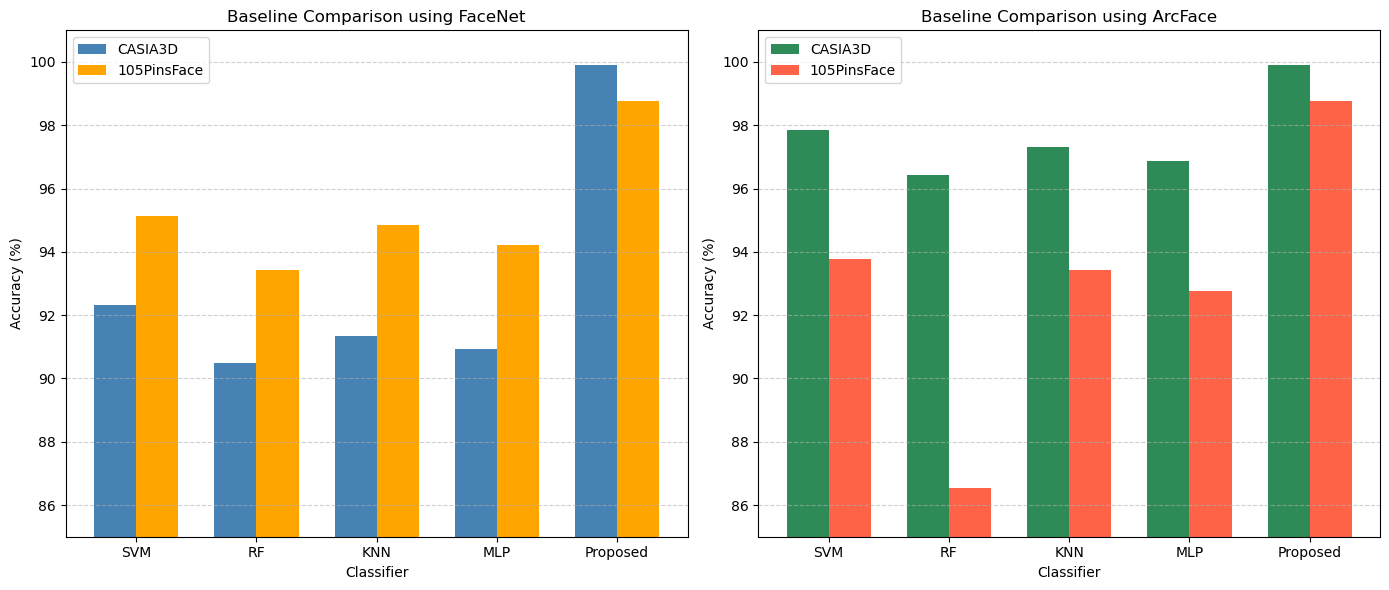

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier labels
classifiers = ['SVM', 'RF', 'KNN', 'MLP', 'Proposed']

# FaceNet accuracy values
casia3d_facenet = [92.32, 90.49, 91.35, 90.92, 99.91]
pinsface_facenet = [95.12, 93.44, 94.86, 94.21, 98.77]

# ArcFace accuracy values
casia3d_arcface = [97.85, 96.42, 97.31, 96.88, 99.91]
pinsface_arcface = [93.79, 86.55, 93.44, 92.75, 98.77]

# Set bar width
bar_width = 0.35
index = np.arange(len(classifiers))

# Create figure
plt.figure(figsize=(14, 6))

# Plot FaceNet results
plt.subplot(1, 2, 1)
plt.bar(index, casia3d_facenet, bar_width, label='CASIA3D', color='steelblue')
plt.bar(index + bar_width, pinsface_facenet, bar_width, label='105PinsFace', color='orange')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Baseline Comparison using FaceNet')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(85, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Plot ArcFace results
plt.subplot(1, 2, 2)
plt.bar(index, casia3d_arcface, bar_width, label='CASIA3D', color='seagreen')
plt.bar(index + bar_width, pinsface_arcface, bar_width, label='105PinsFace', color='tomato')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Baseline Comparison using ArcFace')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(85, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and save as high-res image
plt.tight_layout()
plt.savefig('baseline_comparison_highres.png', dpi=600)  # You can also use 'baseline_comparison.pdf'
plt.show()


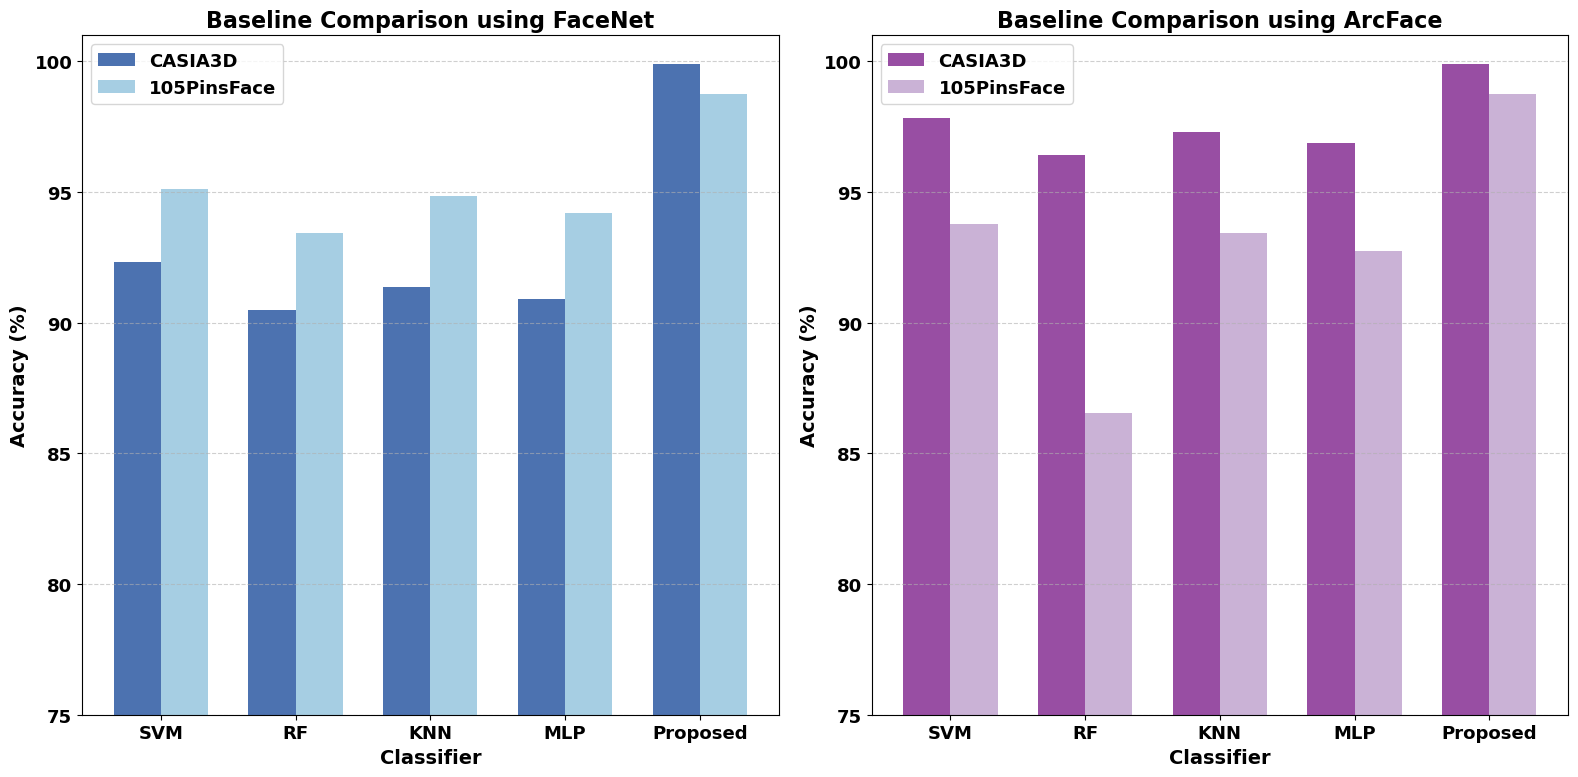

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font sizes for better readability
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13,
    # 'font.weight': 'bold'
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})

# Classifier labels
classifiers = ['SVM', 'RF', 'KNN', 'MLP', 'Proposed']

# FaceNet accuracy values
casia3d_facenet = [92.32, 90.49, 91.35, 90.92, 99.91]
pinsface_facenet = [95.12, 93.44, 94.86, 94.21, 98.77]

# ArcFace accuracy values
casia3d_arcface = [97.85, 96.42, 97.31, 96.88, 99.91]
pinsface_arcface = [93.79, 86.55, 93.44, 92.75, 98.77]

# Set bar width
bar_width = 0.35
index = np.arange(len(classifiers))

# Create figure
plt.figure(figsize=(16, 8))

# Plot FaceNet results
plt.subplot(1, 2, 1)
plt.bar(index, casia3d_facenet, bar_width, label='CASIA3D', color='#4C72B0')       # Deep Blue
plt.bar(index + bar_width, pinsface_facenet, bar_width, label='105PinsFace', color='#A6CEE3')  # Light Blue
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Baseline Comparison using FaceNet')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(80, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Plot ArcFace results
plt.subplot(1, 2, 2)
plt.bar(index, casia3d_arcface, bar_width, label='CASIA3D', color='#984EA3')        # Purple
plt.bar(index + bar_width, pinsface_arcface, bar_width, label='105PinsFace', color='#CAB2D6')  # Light Purple
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Baseline Comparison using ArcFace')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(80, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save high-res image
plt.tight_layout()
plt.savefig('baseline_comparison_better_colors.png', dpi=800)
plt.show()


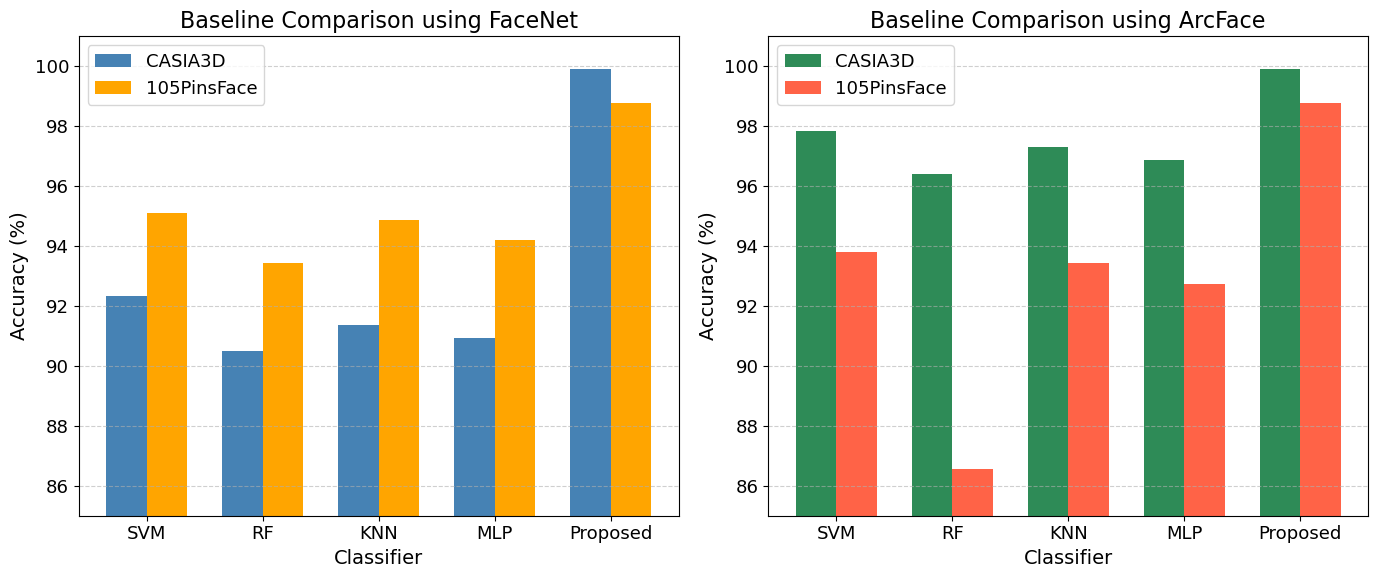

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font sizes for better readability
plt.rcParams.update({
    'font.size': 14,          # Base font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 13,    # X tick label size
    'ytick.labelsize': 13,    # Y tick label size
    'legend.fontsize': 13     # Legend font size
})

# Classifier labels
classifiers = ['SVM', 'RF', 'KNN', 'MLP', 'Proposed']

# FaceNet accuracy values
casia3d_facenet = [92.32, 90.49, 91.35, 90.92, 99.91]
pinsface_facenet = [95.12, 93.44, 94.86, 94.21, 98.77]

# ArcFace accuracy values
casia3d_arcface = [97.85, 96.42, 97.31, 96.88, 99.91]
pinsface_arcface = [93.79, 86.55, 93.44, 92.75, 98.77]

# Set bar width
bar_width = 0.35
index = np.arange(len(classifiers))

# Create figure
plt.figure(figsize=(14, 6))

# Plot FaceNet results
plt.subplot(1, 2, 1)
plt.bar(index, casia3d_facenet, bar_width, label='CASIA3D', color='steelblue')
plt.bar(index + bar_width, pinsface_facenet, bar_width, label='105PinsFace', color='orange')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Baseline Comparison using FaceNet')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(85, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Plot ArcFace results
plt.subplot(1, 2, 2)
plt.bar(index, casia3d_arcface, bar_width, label='CASIA3D', color='seagreen')
plt.bar(index + bar_width, pinsface_arcface, bar_width, label='105PinsFace', color='tomato')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Baseline Comparison using ArcFace')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(85, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and save high-resolution image
plt.tight_layout()
plt.savefig('baseline_comparison_highres_text.png', dpi=800)
plt.show()


In [6]:
pwd

'D:\\'

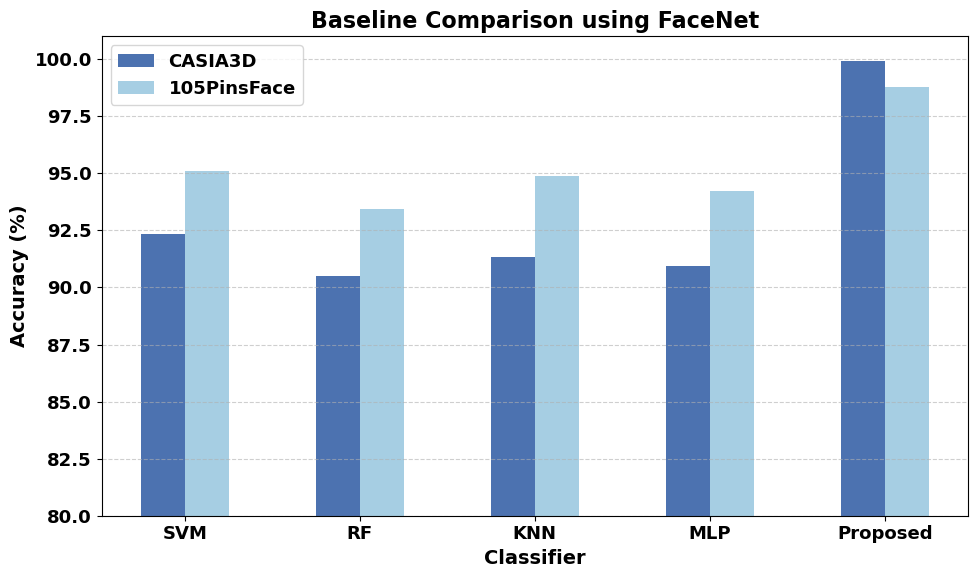

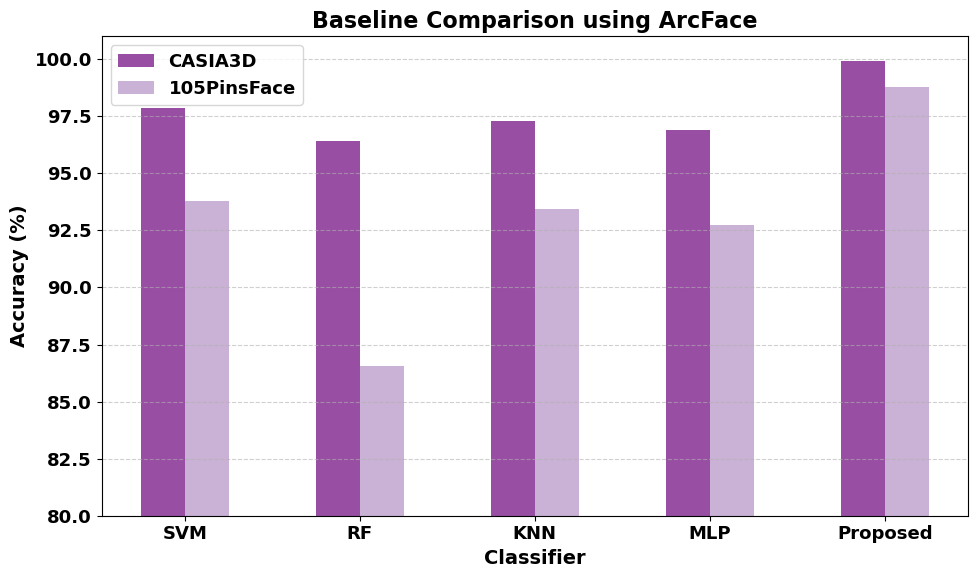

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font sizes and bold weights for better readability
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})

# Classifier labels
classifiers = ['SVM', 'RF', 'KNN', 'MLP', 'Proposed']

# FaceNet accuracy values
casia3d_facenet = [92.32, 90.49, 91.35, 90.92, 99.91]
pinsface_facenet = [95.12, 93.44, 94.86, 94.21, 98.77]

# ArcFace accuracy values
casia3d_arcface = [97.85, 96.42, 97.31, 96.88, 99.91]
pinsface_arcface = [93.79, 86.55, 93.44, 92.75, 98.77]

# Set bar width and positions
bar_width = 0.25
index = np.arange(len(classifiers))

# -------- Plot 1: FaceNet --------
plt.figure(figsize=(10, 6))
plt.bar(index, casia3d_facenet, bar_width, label='CASIA3D', color='#4C72B0')       # Deep Blue
plt.bar(index + bar_width, pinsface_facenet, bar_width, label='105PinsFace', color='#A6CEE3')  # Light Blue
plt.xlabel('Classifier', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Baseline Comparison using FaceNet', fontweight='bold')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(80, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('baseline_comparison_facenet.png', dpi=800)
plt.show()

# -------- Plot 2: ArcFace --------
plt.figure(figsize=(10, 6))
plt.bar(index, casia3d_arcface, bar_width, label='CASIA3D', color='#984EA3')        # Purple
plt.bar(index + bar_width, pinsface_arcface, bar_width, label='105PinsFace', color='#CAB2D6')  # Light Purple
plt.xlabel('Classifier', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Baseline Comparison using ArcFace', fontweight='bold')
plt.xticks(index + bar_width / 2, classifiers)
plt.ylim(80, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('baseline_comparison_arcface.png', dpi=800)
plt.show()
